<p style="margin-bottom:4px"><b>Monte Carlo Methods</b></p>
<h1 style="margin:0px">Homework: Gibbs Sampling</h1>
<br/>
<p style="margin:0px">Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu" style="margin:0px">amk23j@fsu.edu</a>
<p>27th November 2023</p>
<hr style="border:2px solid gray"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.

$$ \pi(x,y) = \begin{cases} e^{-y} ,\  \text{if} \  0 \leq x \leq y \\ 0 , \ \ \text{otherwise} \end{cases} $$

---
### a.
#### To find the marginal distribution of $x$,

$$\pi(x) = \int \pi(x, y) \, dy$$

$$ \pi(x) = \int_{x}^{\infty} e^{-y} dy$$

$$ \pi(x) = [ -e^{-y} ]_{x}^{\infty} $$

$$ \pi(x) = 0 - ( -e^{-x}) $$

$$ \pi(x) = e^{-x}$$

#### To find the marginal distribution of $y$,
$$\pi(y) = \int \pi(x, y) \, dx$$

$$ \pi(y) = \int_{0}^{y} e^{-y} dx $$

$$ \pi(y) = [xe^{-y}]_{0}^{\infty} $$

$$ \pi(y) = ye^{-y} $$

Now, we want to verify that the double integral over the entire domain is equal to 1:

$$\int \pi(x, y) \,dx \,dy = 1$$

Since the domain is the triangular region where \(0 \leq x \leq y\), the integral becomes:

$$ \int_{0}^{\infty} \int_{x}^{\infty} e^{-y} \,dy \,dx$$


$$ \int_{0}^{\infty} \int_{x}^{\infty} e^{-y} \,dy \,dx  $$

$$ = \int_{0}^{\infty} [(-e^{-y})]_{x}^{\infty} \,dx  $$

$$= \int_{0}^{\infty} (0 - (-e^{-x})) \,dx $$

$$= \int_{0}^{\infty} e^{-x} \,dx $$

$$ =  [-e^{-x}]_{0}^{\infty}  $$

$$ = 0 - (-1) = 1$$

---
### b.

We know that, for independent distibutions,

$$ \pi(x,y) = \pi(x)\pi(y) $$

Using the marginal distributions from the question above.

$$ \pi(x)\pi(y) = e^{-x}.ye^{-y} $$

which is not equal to, 
$$\pi(x,y) = e^{-y}$$

$$ \pi(x,y) \neq \pi(x)\pi(y) $$

Hence, $x$ and $y$ are not independent.

---
### c.

#### Pseudocode

1.Initialize the chain at an arbitrary point $(x, y)$ in the domain.

2.Choose a proposal width $\delta$ for the symmetric proposal distribution.

3.Repeat the following steps for a desired number of iterations or until convergence

a. Propose a new point $(x_0, y_0)$ from a symmetric proposal distribution:

- $x' \sim U[x - \delta, x + \delta]$

- $y' \sim U[y - \delta, y + \delta]$

b. Compute the acceptance ratio $\alpha$:

$\alpha = \min(1, \frac{\pi(x', y')}{\pi(x, y)})$

c. Generate a uniform random number $u \sim \mathcal{U}(0, 1)$.
d. If $u \leq \alpha$, accept the proposed move:
- Set $(x, y) = (x', y')$
e. Otherwise, reject the proposed move.




---
### d.

$$ \pi(x|y) = {\pi(x,y) \over \pi(y)} = {e^{-y} \over ye^{-y}} = {1 \over y}$$

This is a uniform distribution , which confirms that $\pi(x∣y)$ is indeed uniform.

$$ \pi(y|x) = {\pi(x,y) \over \pi(x)} = {e^{-y} \over e^{-x}} = e^{-(y-x)}$$

This is an exponential distribution with parameter $\lambda=1$, which confirms that $\pi(y∣x)$ is exponential

---
### e.

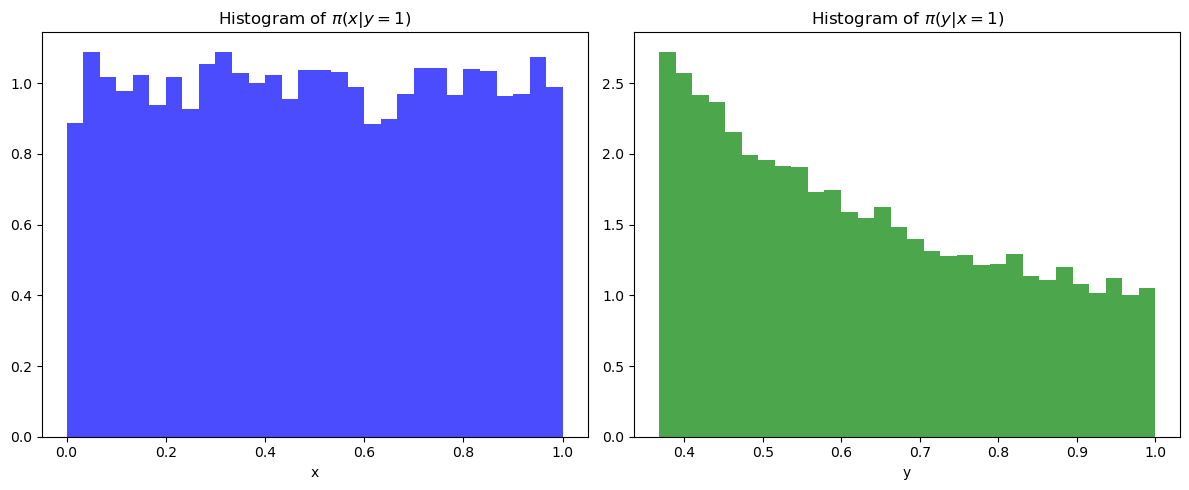

In [2]:
num_samples = 10000

samples_pi_x_given_y = np.random.uniform(0, 1, num_samples)/1

samples_pi_y_given_x = np.exp(np.random.uniform(0, 1, num_samples)-1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_pi_x_given_y, bins=30, density=True, color='blue', alpha=0.7)
plt.title(r'Histogram of $\pi(x|y=1)$')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.hist(samples_pi_y_given_x, bins=30, density=True, color='green', alpha=0.7)
plt.title(r'Histogram of $\pi(y|x=1)$')
plt.xlabel('y')

plt.tight_layout()
plt.show()


---
### f.

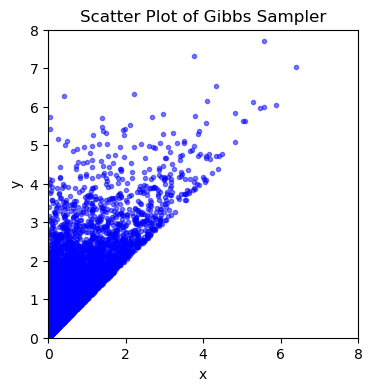

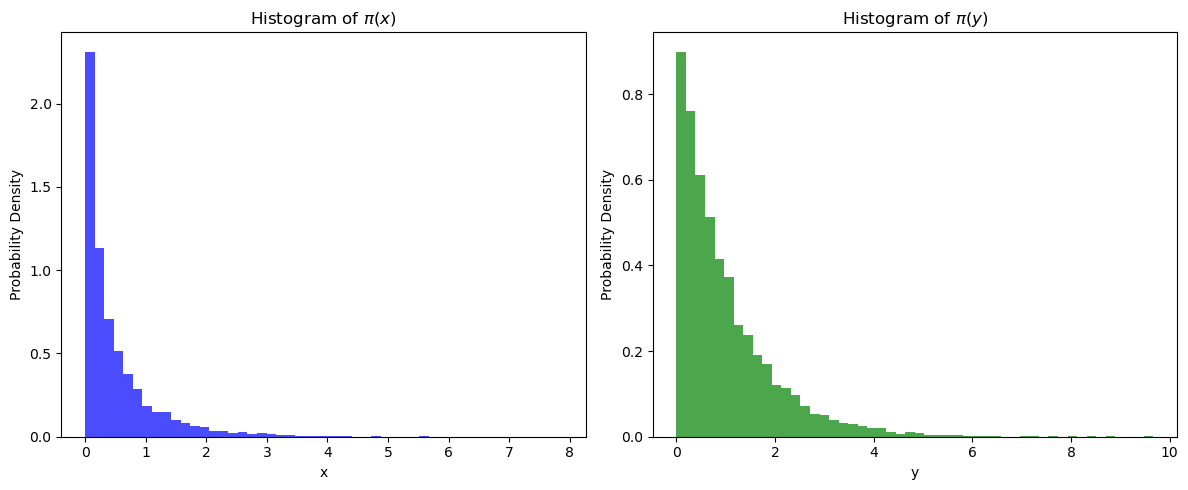

In [3]:
def pi_joint(x, y):
    return np.exp(-y) if 0 <= x <= y else 0

def sample_x_given_y(y):
    return np.random.uniform(0, y)

def sample_y_given_x(x):
    return -np.log(np.random.uniform(0, 1))

num_samples = 10000
burn_in_percentage = 0.1
burn_in = int(num_samples * burn_in_percentage)

samples_x = np.zeros(num_samples)
samples_y = np.zeros(num_samples)

x, y = 1, 2

for i in range(1,num_samples):
    ynew = sample_y_given_x(samples_x[i-1])
    xnew = sample_x_given_y(ynew)
    samples_x[i] = xnew
    samples_y[i] = ynew

samples_x = samples_x[burn_in:]
samples_y = samples_y[burn_in:]

plt.figure(figsize=(4, 4))
plt.xlim(0,8)
plt.ylim(0,8)
plt.scatter(samples_x, samples_y, alpha=0.5, marker='.', color='blue')
plt.title('Scatter Plot of Gibbs Sampler')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_x, bins=50, density=True, color='blue', alpha=0.7, label='Gibbs Sampler')
plt.title('Histogram of $\pi(x)$')
plt.xlabel('x')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(samples_y, bins=50, density=True, color='green', alpha=0.7, label='Gibbs Sampler')
plt.title('Histogram of $\pi(y)$')
plt.xlabel('y')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

___
## 2. Radius of Gyration of a Nonuniform Sphere


### Conditional Distributions

$$ \pi(x|y,z) = \sqrt{1-y^2-z^2} $$

$$ \pi(y|x,z) = \sqrt{1-x^2-z^2} $$

$$ \pi(z|x,z) = \sqrt{1-x^2-y^2} $$


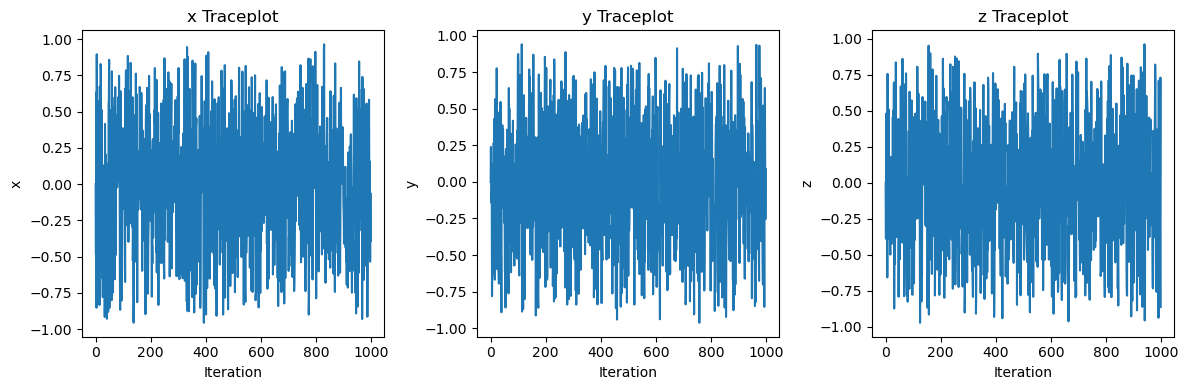

In [4]:
npts = 1000
x = np.zeros(npts)
y = np.zeros(npts)
z = np.zeros(npts)

def pi_x(y,z):
    return np.sqrt(1 - y**2 - z**2)

def pi_y(x,z):
    return np.sqrt(1 - x**2 - z**2)

def pi_z(x,y):
    return np.sqrt(1 - x**2 - y**2)

for i in range(1,npts):
    x[i] = np.random.uniform(-pi_x(y[i-1],z[i-1]),pi_x(y[i-1],z[i-1]))
    y[i] = np.random.uniform(-pi_y(x[i],z[i-1]), pi_y(x[i],z[i-1]))
    z[i] = np.random.uniform(-pi_z(x[i],y[i]), pi_z(x[i],y[i]))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, label=f'x Trace')
plt.title(f'x Traceplot')
plt.xlabel('Iteration')
plt.ylabel(f'x')

plt.subplot(1, 3, 2)
plt.plot(y, label=f'y Trace')
plt.title(f'y Traceplot')
plt.xlabel('Iteration')
plt.ylabel(f'y')

plt.subplot(1, 3, 3)
plt.plot(z, label=f'z Trace')
plt.title(f'z Traceplot')
plt.xlabel('Iteration')
plt.ylabel(f'z')
plt.tight_layout()
plt.show()


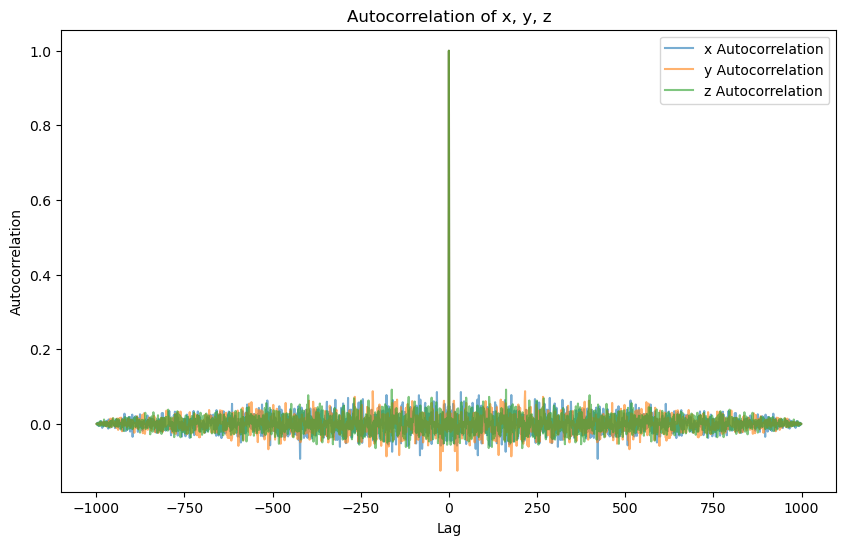

In [5]:
def plot_autocorrelation(samples, variable_names):
    plt.figure(figsize=(10, 6))

    for i, variable_name in enumerate(variable_names):
        autocorr = np.correlate(samples[:, i], samples[:, i], mode='full')
        autocorr = autocorr / np.max(autocorr)  # Normalize autocorrelation
        lag_range = np.arange(-len(samples) + 1, len(samples))
        plt.plot(lag_range, autocorr, label=f'{variable_name} Autocorrelation',alpha = 0.6)

    plt.title('Autocorrelation of x, y, z')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.show()
plot_autocorrelation(np.column_stack((x,y,z)), ['x', 'y', 'z'])

In [6]:
def radius_of_gyration(samples):
    N = len(samples)

    integral_1 = np.sum(samples[:, 2]**2 * (1 - samples[:, 0]**2 - samples[:, 1]**2))
    integral_2 = np.sum(1 - samples[:, 0]**2 - samples[:, 1]**2)

    Rg_squared = (integral_1 / integral_2) / N

    return np.sqrt(Rg_squared)


def block_average(samples, block_size):
    num_blocks = len(samples) // block_size
    block_averages = np.zeros(num_blocks)

    for i in range(num_blocks):
        block = samples[i * block_size : (i + 1) * block_size]
        block_averages[i] = radius_of_gyration(block)

    return np.mean(block_averages), np.std(block_averages) / np.sqrt(num_blocks)


block_size = 1000
avg, uncertainty = block_average(np.column_stack((x,y,z)), block_size)

In [7]:
print("Estimated Radius of gyration: ", avg)
print("Associated Uncertainity : ", uncertainty)

Estimated Radius of gyration:  0.015445263765126267
Associated Uncertainity :  0.0
